<a href="https://colab.research.google.com/github/hyunku/Exploratory_Data_Analysis/blob/main/pming3_project_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#그래프그리기위한 한글 폰트(나눔) 설치
##코랩으로 돌릴시 해당 코드 실시후, 런타임 재시작!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 프로그래밍3 
- 교통사고분석시스템(TAAS)에서 가져온 서울특별시 내의 어린이보호구역에서 발생한 사고 데이터


## 데이터 불러오기
excel 파일의 데이터를 수집하였기 때문에 엑셀형식의 파일을 불러오기 위해 모듈 설치

In [ ]:
!pip install xlrd==1.2.0
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#필요한 모듈 import
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# pd.set_option('display.max_rows', None) # 전체 row 보기
pd.options.display.max_rows = 60 # row보기 디폴트값

In [ ]:
# read_excel을 통해  파일 불러와서 acc로 저장
acc = pd.read_excel("/content/drive/MyDrive/18~20서울특별시_어린이보호구역 사고.xlsx", engine='openpyxl')
acc

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2018010800100107,2018년 1월 8일 08시,월요일,서울특별시 종로구 사직동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,여,36세,상해없음,보행자,여,32세,경상
1,2018010800100369,2018년 1월 8일 17시,월요일,서울특별시 서초구 양재동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,자전거,여,55세,경상,승용,여,66세,상해없음
2,2018011000100354,2018년 1월 10일 15시,수요일,서울특별시 도봉구 창동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,70세,상해없음,원동기,남,54세,경상
3,2018011200100219,2018년 1월 12일 10시,금요일,서울특별시 구로구 온수동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,기타 - 기타,승용,여,64세,경상,화물,남,26세,경상
4,2018011400100460,2018년 1월 14일 23시,일요일,서울특별시 동작구 흑석동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,58세,상해없음,승용,여,36세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2020122000100348,2020년 12월 20일 23시,일요일,서울특별시 관악구 봉천동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,이륜,남,41세,경상,승용,남,51세,상해없음
787,2020122100100593,2020년 12월 21일 21시,월요일,서울특별시 성북구 석관동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,이륜,남,37세,상해없음,보행자,남,33세,경상
788,2020122800100232,2020년 12월 28일 13시,월요일,서울특별시 동작구 대방동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,승합,남,29세,상해없음,승용,남,71세,상해없음
789,2020122800100237,2020년 12월 28일 13시,월요일,서울특별시 은평구 갈현동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,여,29세,상해없음,자전거,남,88세,경상


## 데이터 확인
데이터의 형태와 구성을 살펴보도록 하자.

In [ ]:
#데이터의 행과 열의 수
acc.shape

(791, 22)

In [ ]:
#info를 통해 추가 정보 확인
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        791 non-null    int64 
 1   사고일시        791 non-null    object
 2   요일          791 non-null    object
 3   시군구         791 non-null    object
 4   사고내용        791 non-null    object
 5   사망자수        791 non-null    int64 
 6   중상자수        791 non-null    int64 
 7   경상자수        791 non-null    int64 
 8   부상신고자수      791 non-null    int64 
 9   사고유형        791 non-null    object
 10  법규위반        791 non-null    object
 11  노면상태        791 non-null    object
 12  기상상태        791 non-null    object
 13  도로형태        791 non-null    object
 14  가해운전자 차종    791 non-null    object
 15  가해운전자 성별    791 non-null    object
 16  가해운전자 연령    791 non-null    object
 17  가해운전자 상해정도  791 non-null    object
 18  피해운전자 차종    772 non-null    object
 19  피해운전자 성별    772 non-null    object
 20  피해운전자 연령  

## 컬럼 조정_ 새로운 컬럼생성

- 사고일시컬럼을 통해 **'시간' ,'월', '계절**'이라는 새로운 컬럼을 생성
- 사망자수 + 중상자수 + 경상자수 + 부상신고자수의 합을 통해 **'피해자수'** 라는 컬럼을 생성.
- '-'를 통해 연결되어있는 내용을 분리.
- 컬럼명을 영어로 변경.

In [ ]:
acc.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [ ]:
#시간, 월 컬럼
acc['월'] = ''
acc['시간']=''
for i in range(len(acc)):
  acc['시간'][i] = acc['사고일시'][i][-3:-1]
  acc['사고일시'][i] = acc['사고일시'][i][:-4]
  acc['사고일시'][i] = acc['사고일시'][i].replace(" ","")

  if acc['사고일시'][i][6] == '월':   # 사고일시 월 일에 0 추가
    acc['사고일시'][i] = acc['사고일시'][i][:5] + "0" + acc['사고일시'][i][5:]
  if acc['사고일시'][i][9] == '일':
    acc['사고일시'][i] = acc['사고일시'][i][:8] + "0" + acc['사고일시'][i][8:]

  acc['월'][i] = acc['사고일시'][i][5:7]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A v

In [ ]:
#계절 컬럼
acc['계절'] = ''
winter = ["12","01","02"]
spring = ["03","04","05"]
summer = ["06","07","08"]
autumn = ["09","10","11"]

for i in range(len(acc)):

  if acc['사고일시'][i][5:7] in winter:  # 계절 속성 추가
    acc['계절'][i] = "winter"
  if acc['사고일시'][i][5:7] in spring:
    acc['계절'][i] = "spring"
  if acc['사고일시'][i][5:7] in summer:
    acc['계절'][i] = "summer"
  if acc['사고일시'][i][5:7] in autumn:
    acc['계절'][i] = "autumn"




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as

In [ ]:
#피해자수 컬럼
acc['피해자수'] = ''
for i in range(len(acc)):
  acc['피해자수'][i] = int(acc['사망자수'][i]) + int(acc['중상자수'][i]) + int(acc['경상자수'][i]) + int(acc['부상신고자수'][i]) # 피해자수 속성 추출


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#시군구 추출
for i in range(len(acc)):
  acc['시군구'][i] = acc['시군구'][i][6:10].strip() # 지역에서 구만 추출

#글자수 차이로 추출 잘못된 중구 정리  
  if acc['시군구'][i] == '중구 신':
    acc['시군구'][i] = '중구'
  if acc['시군구'][i] == '중구 필':
    acc['시군구'][i] = '중구'
  if acc['시군구'][i] == '중구 황':
    acc['시군구'][i] = '중구'
  if acc['시군구'][i] == '중구 흥':
    acc['시군구'][i] = '중구'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

데이터 안에 -로 되어있는 내용을 두개의 컬럼으로 분해시켜 주었다.

In [ ]:
#acc에서 분리해서 새로운 df로 저장
사고유형=acc['사고유형'].str.split("-",expand=True)
도로형태=acc['도로형태'].str.split("-",expand=True)
노면상태=acc['노면상태'].str.split("-",expand=True)

In [ ]:
#사고유형의 경우 대부분이 결측값인 2열까지 생성되므로 제거, 노면상태의 경우 대부분이 포장으로 되어있는 0열 제거
사고유형.drop(columns=2,inplace=True)
노면상태.drop(columns=0,inplace=True)
#컬럼이름 변경
사고유형.columns=['사고유형','사고유형_detail']
도로형태.columns=['도로형태','도로형태_detail']
노면상태.columns=['노면상태']


In [ ]:
#acc데이터 안의 컬럼 삭제
acc.drop('사고유형', axis = 1,inplace=True)
acc.drop('도로형태', axis = 1,inplace=True)
acc.drop('노면상태', axis = 1,inplace=True)

In [ ]:
acc=pd.concat([acc,사고유형, 도로형태,노면상태], axis=1)

In [ ]:
acc

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,법규위반,...,피해운전자 상해정도,월,시간,계절,피해자수,사고유형,사고유형_detail,도로형태,도로형태_detail,노면상태
0,2018010800100107,2018년01월08일,월요일,종로구,경상사고,0,0,1,0,안전운전불이행,...,경상,01,08,winter,1,차대사람,횡단중,단일로,기타,건조
1,2018010800100369,2018년01월08일,월요일,서초구,경상사고,0,0,1,0,안전운전불이행,...,상해없음,01,17,winter,1,차대차,기타,단일로,기타,건조
2,2018011000100354,2018년01월10일,수요일,도봉구,경상사고,0,0,1,0,안전거리미확보,...,경상,01,15,winter,1,차대차,기타,단일로,기타,건조
3,2018011200100219,2018년01월12일,금요일,구로구,경상사고,0,0,2,0,안전운전불이행,...,경상,01,10,winter,2,차대차,기타,기타,기타,건조
4,2018011400100460,2018년01월14일,일요일,동작구,경상사고,0,0,1,0,안전거리미확보,...,경상,01,23,winter,1,차대차,측면충돌,교차로,교차로안,건조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2020122000100348,2020년12월20일,일요일,관악구,경상사고,0,0,1,0,안전운전불이행,...,상해없음,12,23,winter,1,차대차,기타,단일로,기타,기타
787,2020122100100593,2020년12월21일,월요일,성북구,경상사고,0,0,1,0,안전운전불이행,...,경상,12,21,winter,1,차대사람,횡단중,단일로,기타,건조
788,2020122800100232,2020년12월28일,월요일,동작구,경상사고,0,0,1,0,과속,...,상해없음,12,13,winter,1,차대차,추돌,단일로,기타,건조
789,2020122800100237,2020년12월28일,월요일,은평구,경상사고,0,0,1,0,안전운전불이행,...,경상,12,13,winter,1,차대차,측면충돌,교차로,교차로안,건조


In [ ]:
acc.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '법규위반', '기상상태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '월', '시간', '계절',
       '피해자수', '사고유형', '사고유형_detail', '도로형태', '도로형태_detail', '노면상태'],
      dtype='object')

In [ ]:
# 컬럼 순서 변경
acc = acc[['사고번호', '사고일시','월', '요일','계절', '시간', '시군구', '사고내용','피해자수',  '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '사고유형_detail', '법규위반', '노면상태', '기상상태', '도로형태', '도로형태_detail', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
       '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']]

In [ ]:
#컬럼이름 변경
###영어로 컬럼이름 전체 변경
col_map={'사고번호':'acc_num', '사고일시':'date','월':'month', '요일':'day_week','계절':'season' ,'시간':'time','시군구':'sigungu', '사고내용': 'acc_detail', '피해자수':'victim','사망자수':'death', '중상자수':'injured', '경상자수':'wound', '부상신고자수':'reported',
         '사고유형':'PV', '사고유형_detail':'PV_detail','법규위반':'violations', '노면상태':'road_condition', '기상상태':'weather', '도로형태':'road', '도로형태_detail':'road_detail', '가해운전자 차종':'P_car', '가해운전자 성별':'P_gender',
       '가해운전자 연령':'P_age', '가해운전자 상해정도':"P_DgrInj", '피해운전자 차종':'V_car', '피해운전자 성별':'V_gender', '피해운전자 연령':'V_age',
       '피해운전자 상해정도':'V_DgrInj'
  }

acc=acc.rename(columns=col_map)

## 데이터 확인을 통한 전처리

In [ ]:
acc.T

,0,1,2,3,4,5,6,7,8,9,...,781,782,783,784,785,786,787,788,789,790
acc_num,2018010800100107,2018010800100369,2018011000100354,2018011200100219,2018011400100460,2018011700100451,2018011700100494,2018012300100117,2018012900100033,2018012900100272,...,2020121000100512,2020121200100149,2020121700100213,2020121700100246,2020121700100347,2020122000100348,2020122100100593,2020122800100232,2020122800100237,2020123100100527
date,2018년01월08일,2018년01월08일,2018년01월10일,2018년01월12일,2018년01월14일,2018년01월17일,2018년01월17일,2018년01월23일,2018년01월29일,2018년01월29일,...,2020년12월10일,2020년12월12일,2020년12월17일,2020년12월17일,2020년12월17일,2020년12월20일,2020년12월21일,2020년12월28일,2020년12월28일,2020년12월31일
month,01,01,01,01,01,01,01,01,01,01,...,12,12,12,12,12,12,12,12,12,12
day_week,월요일,월요일,수요일,금요일,일요일,수요일,수요일,화요일,월요일,월요일,...,목요일,토요일,목요일,목요일,목요일,일요일,월요일,월요일,월요일,목요일
season,winter,winter,winter,winter,winter,winter,winter,winter,winter,winter,...,winter,winter,winter,winter,winter,winter,winter,winter,winter,winter
time,08,17,15,10,23,18,19,09,04,14,...,22,12,12,13,16,23,21,13,13,21
sigungu,종로구,서초구,도봉구,구로구,동작구,도봉구,금천구,양천구,서대문구,강동구,...,구로구,강서구,영등포구,중구,서초구,관악구,성북구,동작구,은평구,동작구
acc_detail,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,부상신고사고,부상신고사고,경상사고,...,경상사고,중상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,중상사고
victim,1,1,1,2,1,1,2,1,1,1,...,4,1,1,1,1,1,1,1,1,1
death,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#정규표현식을 이용해 데이터 정리: 나이에서 '세'제거
import re
acc['V_age']= acc['V_age'].str.extract('(\d+)')
acc['P_age']= acc['P_age'].str.extract('(\d+)')

### 결측값 처리


In [ ]:
#결측값 확인
acc.isna().sum()

acc_num            0
date               0
month              0
day_week           0
season             0
time               0
sigungu            0
acc_detail         0
victim             0
death              0
injured            0
wound              0
reported           0
PV                 0
PV_detail          0
violations         0
road_condition     0
weather            0
road               0
road_detail        0
P_car              0
P_gender           0
P_age             11
P_DgrInj           0
V_car             19
V_gender          19
V_age             21
V_DgrInj          19
dtype: int64

- 가해운전자 나이와 피해운전자 관련 항목에서 null값이 존재한다.


In [ ]:
#가해운전자 나이가 결측값인 행 확인
acc[acc.P_age.isnull()].T

,33,49,60,162,191,357,428,471,537,554,727
acc_num,2018030200100201,2018040100100079,2018041600100449,2018082300100004,2018101500100511,2019061800100058,2019082200100655,2019100400100534,2019120500100456,2019122300100575,2020091300100288
date,2018년03월02일,2018년04월01일,2018년04월16일,2018년08월23일,2018년10월15일,2019년06월18일,2019년08월22일,2019년10월04일,2019년12월05일,2019년12월23일,2020년09월13일
month,03,04,04,08,10,06,08,10,12,12,09
day_week,금요일,일요일,월요일,목요일,월요일,화요일,목요일,금요일,목요일,월요일,일요일
season,spring,spring,spring,summer,autumn,summer,summer,autumn,winter,winter,autumn
time,12,05,18,00,20,03,22,18,17,20,16
sigungu,중랑구,광진구,성북구,성북구,광진구,구로구,강동구,종로구,강남구,구로구,서대문구
acc_detail,부상신고사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,부상신고사고
victim,1,1,1,3,2,1,1,1,1,3,1
death,0,0,0,0,0,0,0,0,0,0,0


P_age가 결측값의 경우, P_car과 P_gender값도 기타불명이 대부분으로, 정확한 자료가 없음을 확인할 수 있었다. 하지만 사고는 존재했으므로 0으로 대체

In [ ]:
#피해운전자 나이 null값인 열 확인
acc[acc.V_age.isnull()].T

,50,67,109,186,191,205,250,253,275,411,...,487,490,558,580,582,591,618,763,780,782
acc_num,2018040100100441,2018042500100164,2018061500100660,2018100500100397,2018101500100511,2018110800100212,2019012900100071,2019013000100531,2019031500100218,2019080600100655,...,2019101800100511,2019102200100589,2019122600100020,2020011900100092,2020012100100037,2020020300100002,2020033000100530,2020110800100515,2020120900100319,2020121200100149
date,2018년04월01일,2018년04월25일,2018년06월15일,2018년10월05일,2018년10월15일,2018년11월08일,2019년01월29일,2019년01월30일,2019년03월15일,2019년08월06일,...,2019년10월18일,2019년10월22일,2019년12월26일,2020년01월19일,2020년01월21일,2020년02월03일,2020년03월30일,2020년11월08일,2020년12월09일,2020년12월12일
month,04,04,06,10,10,11,01,01,03,08,...,10,10,12,01,01,02,03,11,12,12
day_week,일요일,수요일,금요일,금요일,월요일,목요일,화요일,수요일,금요일,화요일,...,금요일,화요일,목요일,일요일,화요일,월요일,월요일,일요일,수요일,토요일
season,spring,spring,summer,autumn,autumn,autumn,winter,winter,spring,summer,...,autumn,autumn,winter,winter,winter,winter,spring,autumn,winter,winter
time,22,10,23,15,20,10,07,21,11,22,...,17,19,00,09,04,00,23,21,16,12
sigungu,종로구,강북구,종로구,중랑구,광진구,중랑구,성북구,성북구,성북구,도봉구,...,성북구,영등포구,동작구,강서구,서대문구,강동구,도봉구,중구,강북구,강서구
acc_detail,경상사고,경상사고,경상사고,경상사고,경상사고,중상사고,경상사고,경상사고,부상신고사고,경상사고,...,경상사고,중상사고,중상사고,중상사고,중상사고,경상사고,경상사고,중상사고,중상사고,중상사고
victim,1,2,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
death,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


차량단독사고이기에 피해자가 없음을 확인할 수 있었다. 
  
   ->피해자 관련 항목 null값은 0으로 대체 

In [ ]:
#결측값 0으로 대체
acc=acc.fillna(0)

#### 데이터타입변경

In [ ]:
#데이터 타입 변경
acc['V_age'] = acc['V_age'].astype('int')
acc['P_age'] = acc['P_age'].astype('int')
acc['victim'] = acc['victim'].astype('int')
acc['month'] = acc['month'].astype('int')

In [ ]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   acc_num         791 non-null    int64 
 1   date            791 non-null    object
 2   month           791 non-null    int64 
 3   day_week        791 non-null    object
 4   season          791 non-null    object
 5   time            791 non-null    object
 6   sigungu         791 non-null    object
 7   acc_detail      791 non-null    object
 8   victim          791 non-null    int64 
 9   death           791 non-null    int64 
 10  injured         791 non-null    int64 
 11  wound           791 non-null    int64 
 12  reported        791 non-null    int64 
 13  PV              791 non-null    object
 14  PV_detail       791 non-null    object
 15  violations      791 non-null    object
 16  road_condition  791 non-null    object
 17  weather         791 non-null    object
 18  road      

## 1. 사건건수와 피해자수에 대한 다양한 요인

In [ ]:
# 요일별 피해자수
acc.groupby("day_week")['victim'].count()

day_week
금요일    155
목요일    118
수요일    109
월요일    122
일요일     75
토요일     73
화요일    139
Name: victim, dtype: int64

In [ ]:
# 계절별 피해자수
acc.groupby("season")['victim'].count()

season
autumn    196
spring    186
summer    232
winter    177
Name: victim, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '계절별 피해자수')

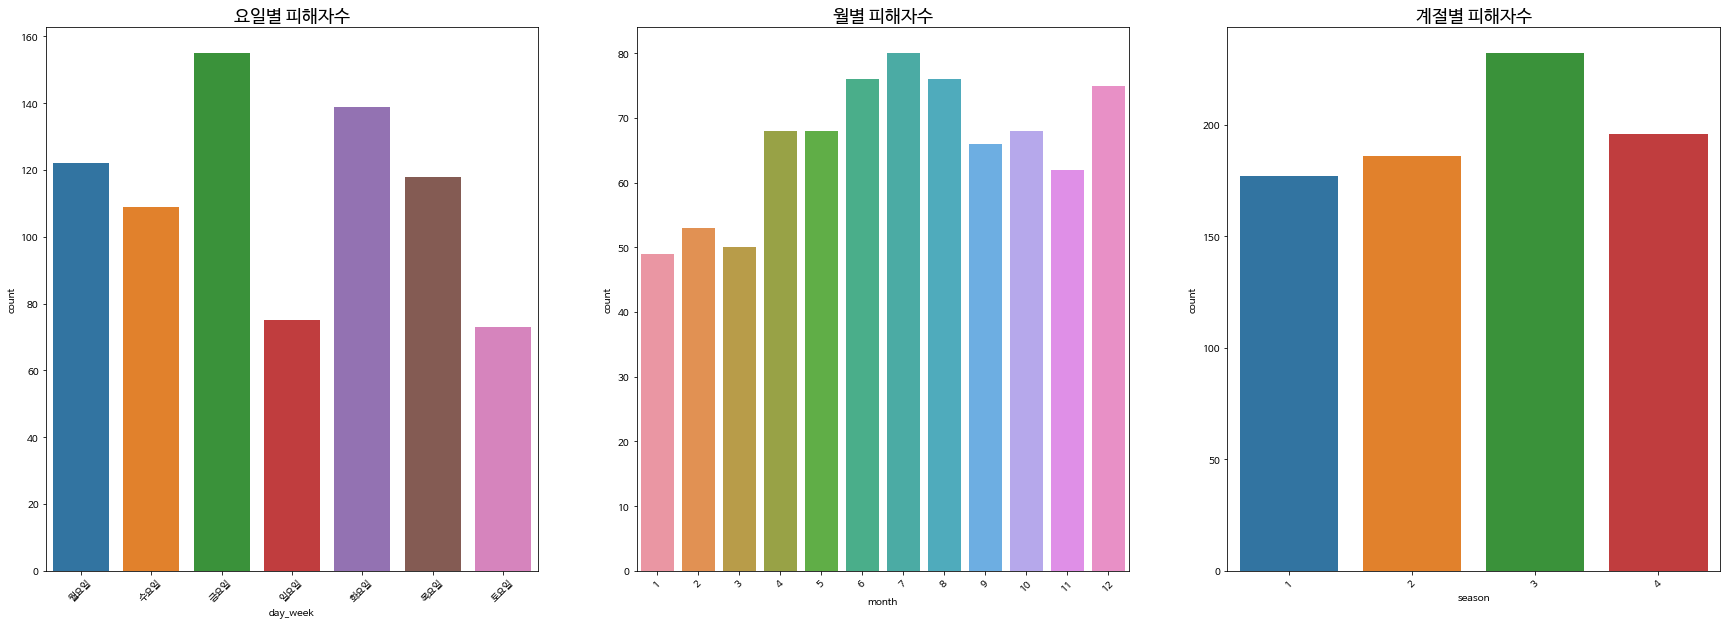

In [ ]:
# 시각화_요일별,월별, 계절별 피해자수
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10), squeeze=False)

plt.rc('font', size=15) 

chart0 = sns.countplot(acc['day_week'], ax=axs[0][0]) # 요일별 전체 사고 건수
chart0.set_xticklabels(chart0.get_xticklabels(), rotation=45)
chart0.set_title("요일별 피해자수")
chart1 = sns.countplot(acc['month'], ax=axs[0][1]) # 월별 전체 사고 건수
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title("월별 피해자수")
chart2 = sns.countplot(acc['season'], ax=axs[0][2]) # 계절별 전체 사고 건수
chart2.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart2.set_title("계절별 피해자수")

- 시간

In [ ]:
# 시간대별 피해자 수
acc.groupby("time")['victim'].count()

time
00    15
01     8
02    10
03     5
04     6
05     8
06    12
07    24
08    43
09    36
10    37
11    35
12    38
13    52
14    52
15    75
16    86
17    56
18    61
19    43
20    29
21    23
22    17
23    20
Name: victim, dtype: int64

Text(0.5, 1.0, '시간대별 피해자 수')

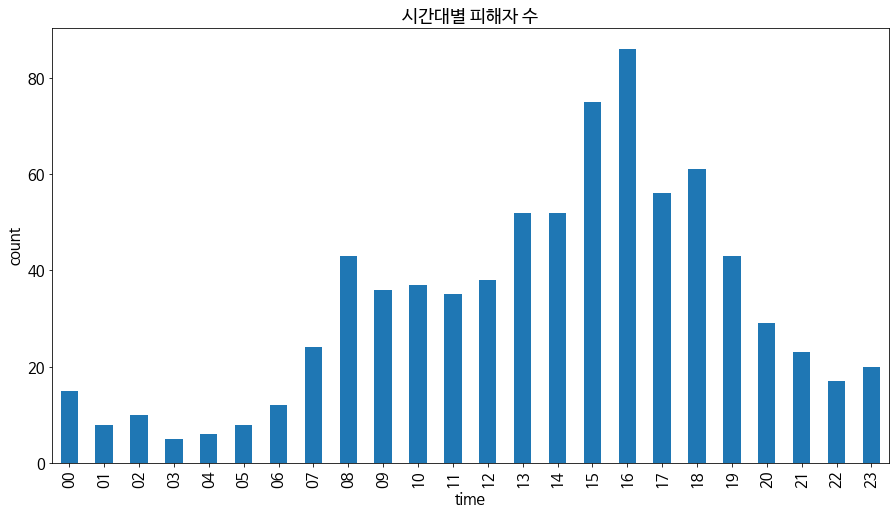

In [ ]:
plt.figure(figsize=(15,8))
acc.groupby("time")['victim'].count().sort_index(ascending=True).plot(kind='bar')
plt.ylabel('count')
plt.title('시간대별 피해자 수')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '시간에 따른 사건건수')

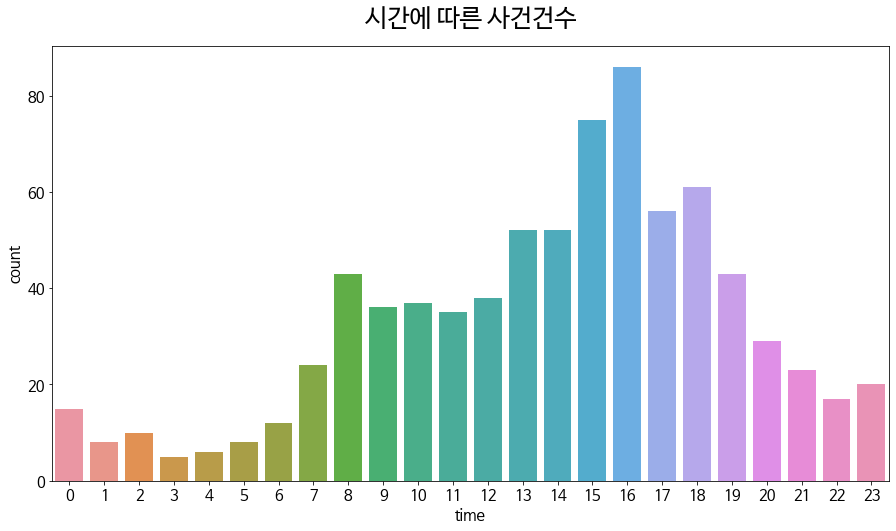

In [ ]:
# 시간대별 사고 건수
plt.figure(figsize=(15,8))
chart4=sns.countplot(acc['time'].astype('int').sort_values())
plt.title("시간대별 사건건수", fontsize = 25, pad=20)

어린이 주 생활시간인 8시~ 19시에서의 발생이 잦으며, 특히 등하교 시간인 8시와 15 ~ 16시가 주변에 비해 두드러지게 증가한것을 확인 

In [ ]:
acc

,acc_num,date,month,day_week,season,time,sigungu,acc_detail,victim,death,...,road,road_detail,P_car,P_gender,P_age,P_DgrInj,V_car,V_gender,V_age,V_DgrInj
0,2018010800100107,2018년01월08일,1,월요일,winter,08,종로구,경상사고,1,0,...,단일로,기타,승용,여,36,상해없음,보행자,여,32,경상
1,2018010800100369,2018년01월08일,1,월요일,winter,17,서초구,경상사고,1,0,...,단일로,기타,자전거,여,55,경상,승용,여,66,상해없음
2,2018011000100354,2018년01월10일,1,수요일,winter,15,도봉구,경상사고,1,0,...,단일로,기타,승용,남,70,상해없음,원동기,남,54,경상
3,2018011200100219,2018년01월12일,1,금요일,winter,10,구로구,경상사고,2,0,...,기타,기타,승용,여,64,경상,화물,남,26,경상
4,2018011400100460,2018년01월14일,1,일요일,winter,23,동작구,경상사고,1,0,...,교차로,교차로안,승용,남,58,상해없음,승용,여,36,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2020122000100348,2020년12월20일,12,일요일,winter,23,관악구,경상사고,1,0,...,단일로,기타,이륜,남,41,경상,승용,남,51,상해없음
787,2020122100100593,2020년12월21일,12,월요일,winter,21,성북구,경상사고,1,0,...,단일로,기타,이륜,남,37,상해없음,보행자,남,33,경상
788,2020122800100232,2020년12월28일,12,월요일,winter,13,동작구,경상사고,1,0,...,단일로,기타,승합,남,29,상해없음,승용,남,71,상해없음
789,2020122800100237,2020년12월28일,12,월요일,winter,13,은평구,경상사고,1,0,...,교차로,교차로안,승용,여,29,상해없음,자전거,남,88,경상


- 피해자 나이

In [ ]:
#피해자 나이에 따른 컬럼 추가-chile,teen, adult
acc['V_agecond']=''
for i in range(len(acc)):
  if (acc['V_age'][i] > 0) & (acc['V_age'][i] < 13)==True:
    acc['V_agecond'][i]='child'
  elif (acc['V_age'][i] >= 13) & (acc['V_age'][i] < 19) == True:
    acc['V_agecond'][i]='teen'
  elif (acc['V_age'][i] >= 19)==True:
    acc['V_agecond'][i]='adult'
  else: acc['V_agecond'][i]= '0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Se

In [ ]:
#피해자 나이별 사건건수
acc.V_agecond.value_counts()

adult    511
child    232
teen      27
0         21
Name: V_agecond, dtype: int64

In [ ]:
#요일별 피해자 나이의 분류
V_age_D=acc.groupby(['V_agecond','day_week'])['acc_num'].agg('count').unstack('day_week')
V_age_D=V_age_D[['일요일','월요일','화요일','수요일','목요일','금요일','토요일']]
V_age_D

day_week,일요일,월요일,화요일,수요일,목요일,금요일,토요일
V_agecond,,,,,,,
0,3,3,4,3,2,5,1
adult,55,83,86,69,78,89,51
child,15,30,43,35,32,57,20
teen,2,6,6,2,6,4,1


Text(0.5, 1.0, '요일에 따른 성인,청소년,유아의 사건건수')

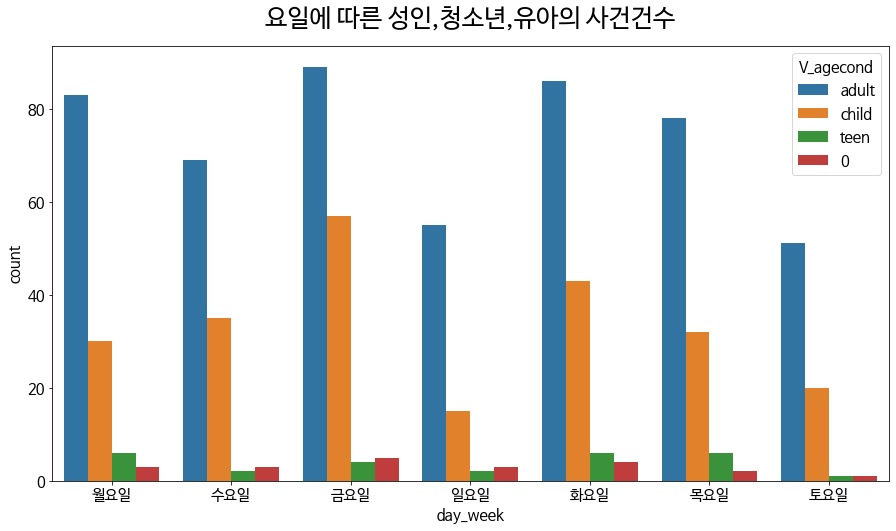

In [ ]:
plt.figure(figsize = (15,8))
chart2=sns.countplot(x='day_week',hue='V_agecond',data=acc)
plt.title("요일에 따른 성인,청소년,유아의 사건건수", fontsize = 25, pad=20)

주말인 일요일과 토요일에는 사건이 적게 발생하며, 어린이 사고의 경우 금요일에 더욱 자주 발생함을 확인

Text(0.5, 1.0, '계절에 따른 성인,청소년,유아의 사건건수')

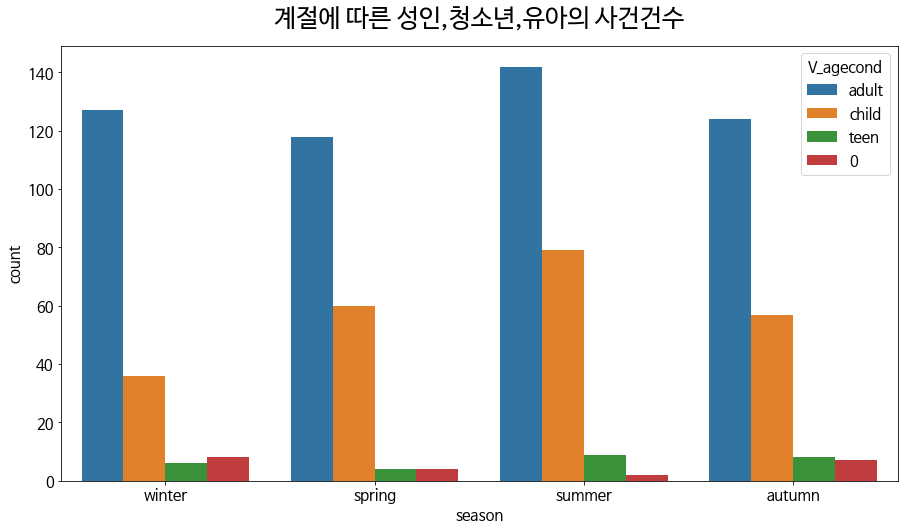

In [ ]:
plt.figure(figsize = (15,8))
chart3=sns.countplot(x='season',hue='V_agecond',data=acc)
plt.title("계절에 따른 성인,청소년,유아의 사건건수", fontsize = 25, pad=20)

어린이 보호구역내, 어린이사고는 여름에 가장 많이 발생되고 겨울에 가장 적게 발생됨을 확인

In [ ]:
season_day=acc.groupby(['season','day_week'])['P_gender'].agg('count').unstack('day_week')
season_day=season_day[['일요일','월요일','화요일','수요일','목요일','금요일','토요일']]
season_day

day_week,일요일,월요일,화요일,수요일,목요일,금요일,토요일
season,,,,,,,
autumn,23,26,31,26,24,47,19
spring,18,23,36,25,30,40,14
summer,15,42,40,32,36,41,26
winter,19,31,32,26,28,27,14


Text(0.5, 1.0, '계절별 요일의 사건발생건수')

<Figure size 2160x2160 with 0 Axes>

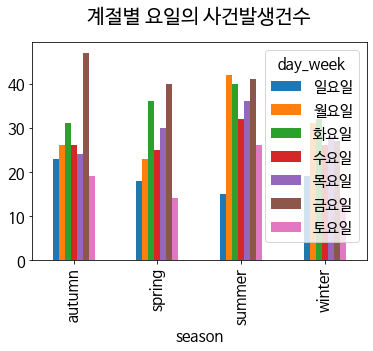

In [ ]:
plt.figure(figsize=(30,30))
season_day.plot(kind='bar')
plt.title('계절별 요일의 사건발생건수',fontsize = 20, pad=20)

- 노면상태

In [ ]:
acc['road_condition'].value_counts()

 건조       685
 젖음/습기     73
 기타        30
 서리/결빙      2
 적설         1
Name: road_condition, dtype: int64

Text(0.5, 1.0, '노면상태에 따른 피해자 수')

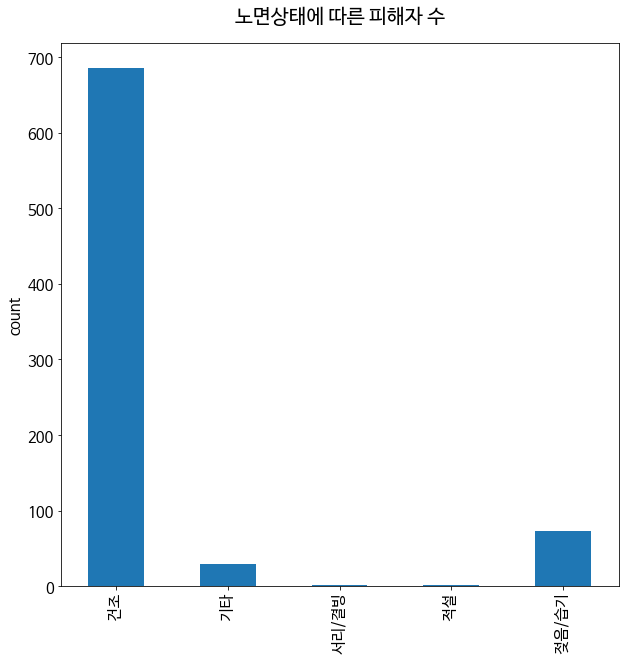

In [ ]:
plt.figure(figsize=(10,10))
acc['road_condition'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.ylabel('count')
plt.title('노면상태에 따른 피해자 수',fontsize = 20, pad=20)

In [ ]:
acc.weather.value_counts()

맑음    691
비      48
흐림     47
기타      3
눈       2
Name: weather, dtype: int64

노면상태와 기상상황을 살펴보면 대부분의 날씨가 맑은날이였고 따라서 건조한 노면상태인 날이 많았음을 알수있다.

- 시군구

In [ ]:
#지역에따른 사고발행횟수_사고다발지역
region_grouped = acc.groupby('sigungu')['sigungu'].count() 
region_grouped.sort_values(inplace=True, ascending=False)
region_grouped_df = pd.DataFrame(region_grouped)
region_grouped_df.columns = ['count']
region_grouped_df.reset_index(drop=False, inplace=True)
region_grouped_df

,sigungu,count
0,성북구,79
1,도봉구,71
2,강서구,65
3,동작구,56
4,구로구,51
5,서초구,46
6,영등포구,40
7,광진구,33
8,은평구,31
9,강남구,30


Text(0.5, 1.0, '시군구 따른 사건건수')

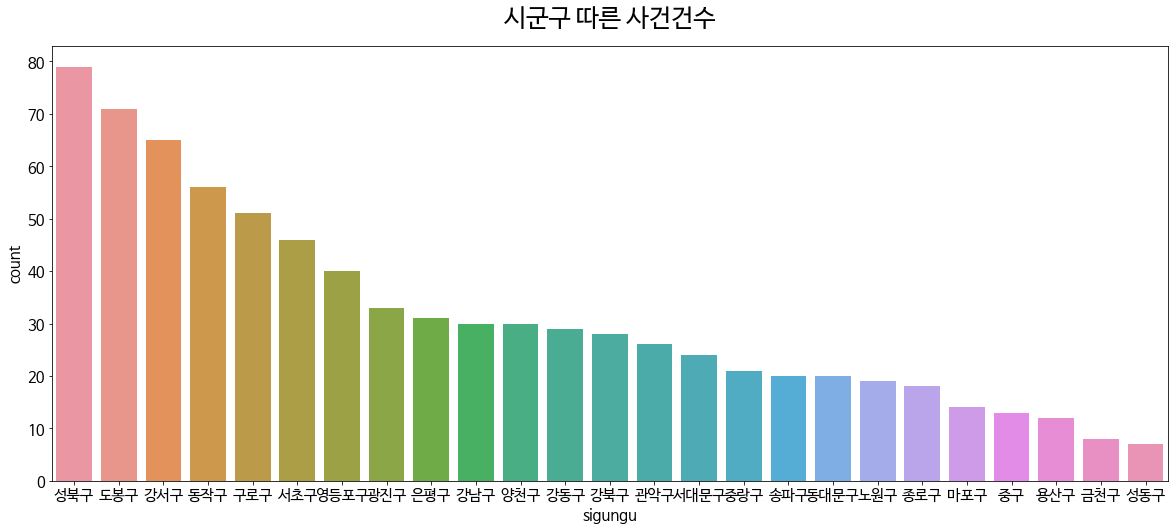

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=region_grouped_df['sigungu'], y=region_grouped_df['count'])
plt.title("시군구 따른 사건건수", fontsize = 25, pad=20)

성북구, 도봉구, 강서구 순서대로 어린이보호구역내 사고가 많았음을 확인

# 2.사고유형에 따른 다양한요인

In [ ]:
acc['PV'].value_counts()

차대사람     388
차대차      383
차량단독      20
Name: PV, dtype: int64

In [ ]:
acc['V_DgrInj'].value_counts()

경상      436
중상      207
상해없음     77
부상신고     41
0        19
사망        6
기타불명      4
미분류       1
Name: V_DgrInj, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '사고유형별 상해정도')

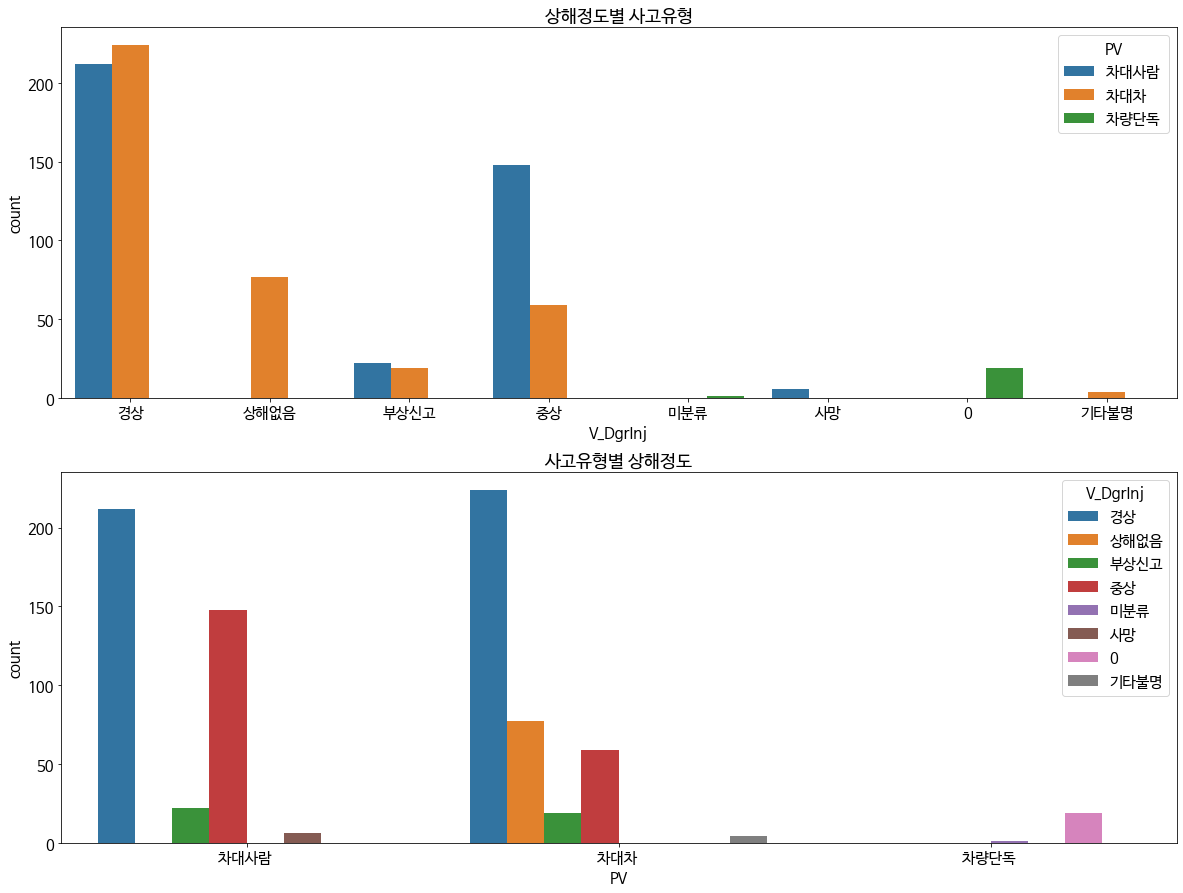

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 15), squeeze=False)
chart0 = sns.countplot(acc['V_DgrInj'], hue=acc['PV'], ax=axs[0][0]) # 상해정도별 사고유형
chart0.set_title("상해정도별 사고유형")
chart1 = sns.countplot(acc['PV'], hue=acc['V_DgrInj'], ax=axs[1][0]) # 사고유형별 상해정도
chart1.set_title("사고유형별 상해정도")

- 상해정도에 따른 사고유형을 통해 어린이 보호구역 내에서의 사고 상해는 대부분 경상이였다.
- 경상을 차지하는 가장많은 부분은, 차대차 사고의 경우이다.

- 사고유형별 상해정도를 보면, 차대차사고의 경우 대부분이 경상이거나 상해없음으로 상해의 정도가 낮음을 확인 가능하다.

# 5. 나이에 따른 피해자 비율

In [ ]:
cond_child = ((acc['V_age'] < 13) & (acc['V_age'] > 0)) # 어린이 조건
cond_teen = ((acc['V_age'] >= 13) & (acc['V_age'] < 19)) # 청소년 조건
cond_adult = (acc['V_age'] >= 19) # 성인 조건

In [ ]:
#피해자 나이별 사건건수
acc.V_agecond.value_counts()

adult    511
child    232
teen      27
0         21
Name: V_agecond, dtype: int64

In [ ]:
print(f'어린이 사고비율 : {round(len(acc[cond_child]) / len(cond_child+cond_teen+cond_adult)*100, 2)}%')
print(f'청소년 사고비율 : {round(len(acc[cond_teen]) /len(cond_child+cond_teen+cond_adult)*100, 2)}%')
print(f'성인 사고비율 : {round(len(acc[cond_adult]) / len(cond_child+cond_teen+cond_adult)*100, 2)}%')


어린이 사고비율 : 29.33%
청소년 사고비율 : 3.41%
성인 사고비율 : 64.6%


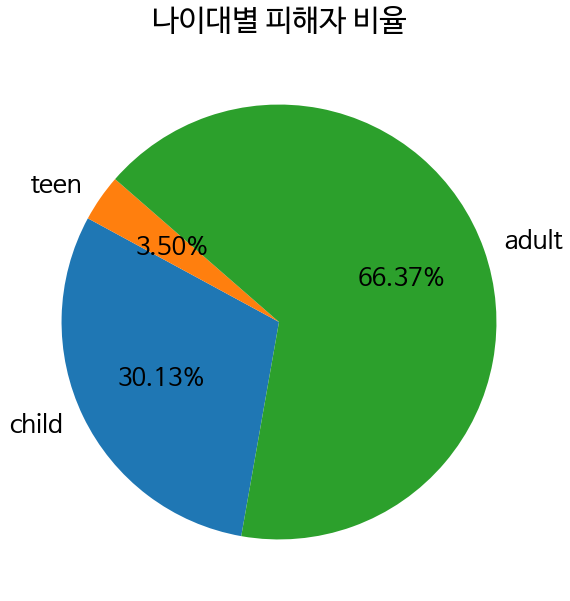

In [ ]:
ratio = [round(len(acc[cond_child]) / len(cond_child+cond_teen+cond_adult)*100, 2), round(len(acc[cond_teen]) / len(cond_child+cond_teen+cond_adult)*100, 2), round(len(acc[cond_adult]) / len(cond_child+cond_teen+cond_adult)*100, 2)]
labels = ['child', 'teen', 'adult']
plt.figure(figsize=(15,10))
plt.rc('font', size=25)
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False)
plt.title("나이대별 피해자 비율", fontsize = 30, pad=20)
plt.show()

어린이 보호구역이라, 피해자가 어린이가 많을 것이라고 예상하였지만, 
- 66.3%가 성인, 청소년이 3.5%, 어린이는 30.1%
- 피해비율이 청소년피해자 보다 어린이피해자가 약 9배정도 많이 발생되었다.


# 6. 성별에 따른 다양한 요인

In [ ]:
acc.columns

Index(['acc_num', 'date', 'month', 'day_week', 'season', 'time', 'sigungu',
       'acc_detail', 'victim', 'death', 'injured', 'wound', 'reported', 'PV',
       'PV_detail', 'violations', 'road_condition', 'weather', 'road',
       'road_detail', 'P_car', 'P_gender', 'P_age', 'P_DgrInj', 'V_car',
       'V_gender', 'V_age', 'V_DgrInj', 'V_agecond'],
      dtype='object')

In [ ]:
#성별, 날씨별 사고수
(
    acc.groupby(["P_gender", 'weather'])
    ['acc_num']
    .count()
    .astype(int)
    .unstack('weather')
)

weather,기타,눈,맑음,비,흐림
P_gender,,,,,
기타불명,NaN,NaN,9.0,1.0,1.0
남,3.0,2.0,527.0,38.0,36.0
여,NaN,NaN,155.0,9.0,10.0


In [ ]:
#가해자 성별에 따른 분류
cond_male_offender = (acc['P_gender'] == '남')
cond_female_offender = (acc['P_gender'] == '여')

In [ ]:
#가해자 성별별 사건발생 건수
monthly_grouped = acc.groupby('month')['month'].count()
monthly_grouped_df = pd.DataFrame(monthly_grouped)
monthly_grouped_df.columns = ['count']
monthly_grouped_df.reset_index(drop=False, inplace=True)

monthly_male_grouped = acc[cond_male_offender].groupby('month')['month'].count()
monthly_male_grouped_df = pd.DataFrame(monthly_male_grouped)
monthly_male_grouped_df.columns = ['male_count']
monthly_male_grouped_df.reset_index(drop=False, inplace=True)

monthly_female_grouped = acc[cond_female_offender].groupby('month')['month'].count()
monthly_female_grouped_df = pd.DataFrame(monthly_female_grouped)
monthly_female_grouped_df.columns = ['female_count']
monthly_female_grouped_df.reset_index(drop=False, inplace=True)

monthly_grouped_df = monthly_grouped_df.merge(monthly_male_grouped_df, on='month', how='left')
monthly_grouped_df = monthly_grouped_df.merge(monthly_female_grouped_df, on='month', how='left')
monthly_grouped_df

,month,count,male_count,female_count
0,1,49,34,15
1,2,53,44,9
2,3,50,39,10
3,4,68,56,10
4,5,68,56,12
5,6,76,54,21
6,7,80,55,25
7,8,76,55,19
8,9,66,52,13
9,10,68,55,11


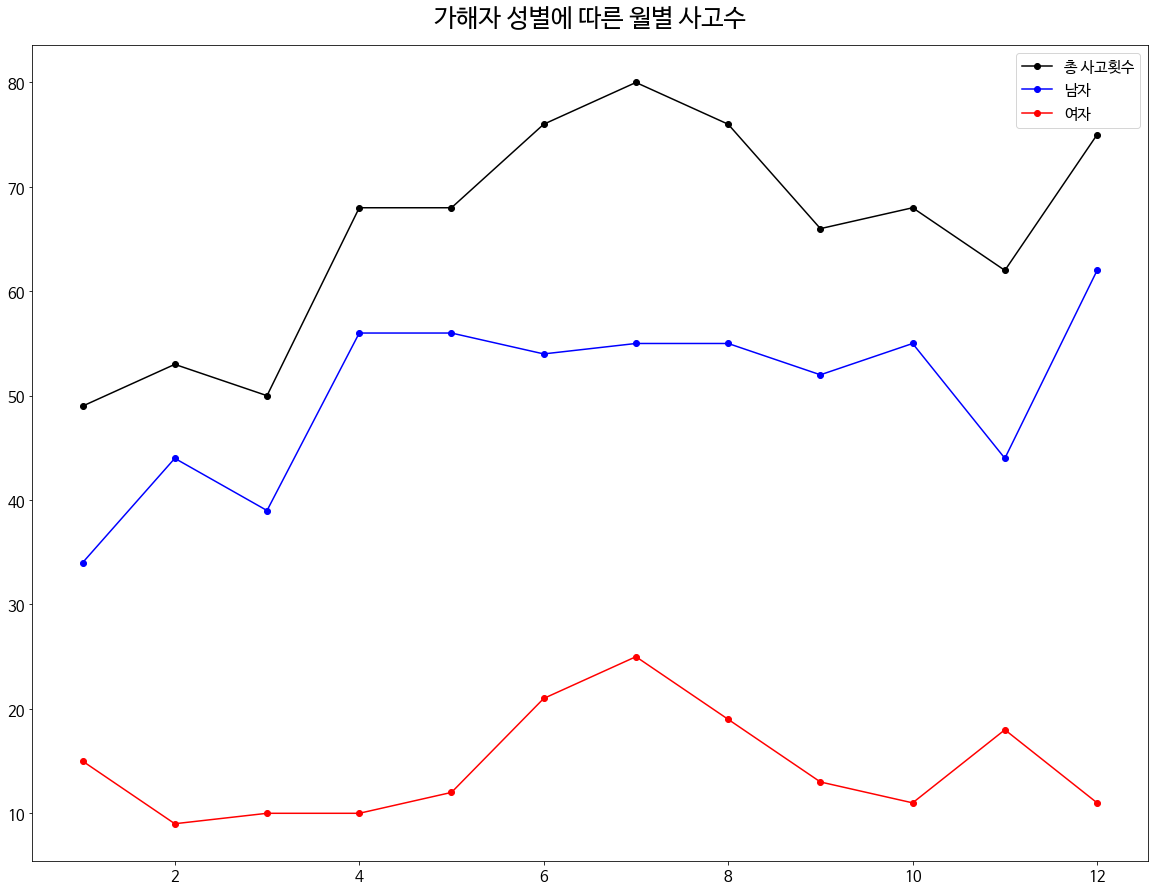

In [ ]:
#	성별에 따른 월별 사고수
plt.figure(figsize=(20,15))
plt.plot(monthly_grouped_df['month'], monthly_grouped_df['count'],'k-',marker='o',label='총 사고횟수')
plt.plot(monthly_grouped_df['month'], monthly_grouped_df['male_count'],'b-', marker='o', label='남자')
plt.plot(monthly_grouped_df['month'], monthly_grouped_df['female_count'],'r-', marker='o', label='여자')
plt.title("가해자 성별에 따른 월별 사고수", fontsize = 25, pad=20)
plt.legend()
plt.show()

여성의 사고수가 더 적으며, 전체 사고수에 성별의 영향을 어떻게 받았는지 확인
- 6~8월의 전체 사고수는 여성의 사고증가로 사고수가 증가하였고
- 12월의 전체 사고수는 남성의 사고증가로 사고수가 증가하였음을 확인가능하다.